<a href="https://colab.research.google.com/github/fathurrahmanyahyasatrio/CreditRiskAnalysis/blob/main/Credit%20Risk%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

Lending Club, based in San Francisco, California, is a leading US peer-to-peer lending company. They holds the distinction of being the first peer-to-peer lender to gain Securities and Exchange Commission (SEC) approval for its offerings and to facilitate loan trading on a secondary market. LendingClub stands as the largest peer-to-peer lending platform globally.

Engaging in this case study will provide insight into the practical application of exploratory data analysis (EDA) and machine learning in solving real-world business challenges. Throughout this analysis, we will also gain a foundational understanding of risk analytics within the banking and financial services sector, and how data plays a pivotal role in minimizing lending risks and preserving capital.

**Business Understanding**




A company specializing in providing a variety of loans to urban customers. When individuals apply for loans, the company must decide whether to approve the loan based on the applicant's profile. It involves in two types of risks:
- If the applicant is likely to repay the loan, not approving the loan results in lost business for the company.
- If the applicant is unlikely to repay the loan, which means they are likely to default, approving loan may result in a financial loss for the company.

The provided dataset contains information about past loan applicants and whether they defaulted on their loans. The objective is to identify patterns that indicate whether a person is likely to default or not. The provided information can be used to make decisions such as denying the loan, reducing the loan amount or offering loans to risky applicants at higher interest rates.

**Business Objectives**

Lending Club is the largest online loan marketplace, offering personal loans, business loans, and financing for medical procedures through an efficient online platform. Similar to other institutions, lending to risky applicants represents the primary souce of financial loss, known as credit loss.

Credit loss is the amount of money lenders lose when borrowers fail to repay their loans, and in this case, customers labeled as 'charged-off' are the defaulters.

In essence, the company aims to understand the key factors (or driver variables) behind loan defaults, which are strong indicators of default. This knowledge can be utilized for portfolio management and risk assessment.

To gain a deeper understanding of the domain, it is recommended to conduct independent research on risk analytics, particularly regarding the types of variables and their significance.

When a person applies for a loan, the company can make two types of decisions:

Loan accepted: If the company approves the loan, there are three possible scenarios:

- Fully paid: The applicant fully repays the loan, including the principal and interest.
- Current: The applicant is in the process of repaying the loan installments, and the loan tenure is ongoing. These candidates are not labeled as 'defaulted.'
- Charged-off: The applicant has not made timely payments for an extended period, resulting in a loan default.
- Loan rejected: The company rejects the loan application, often due to the candidate not meeting their requirements. Since the loan was rejected, there is no transactional history for these applicants with the company, and such data is unavailable in this dataset.


In [11]:
!pip install -q hvplot

In [3]:
!pip install scikit-plot


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import hvplot.pandas

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay
)
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# Install the 'scikitplot' library
!pip install scikit-plot
from scikitplot.metrics import plot_roc_curve

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC



In [5]:
data = pd.read_csv("lending_club_loan_two.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [6]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


### **Exploratory Data Analysis**

#### Data Understanding ####

OVERALL GOAL:

Get an understanding for which variables are important, view summary statistics, and visualize the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

<ipython-input-9-5c64625a23e9>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='viridis')


<Axes: >

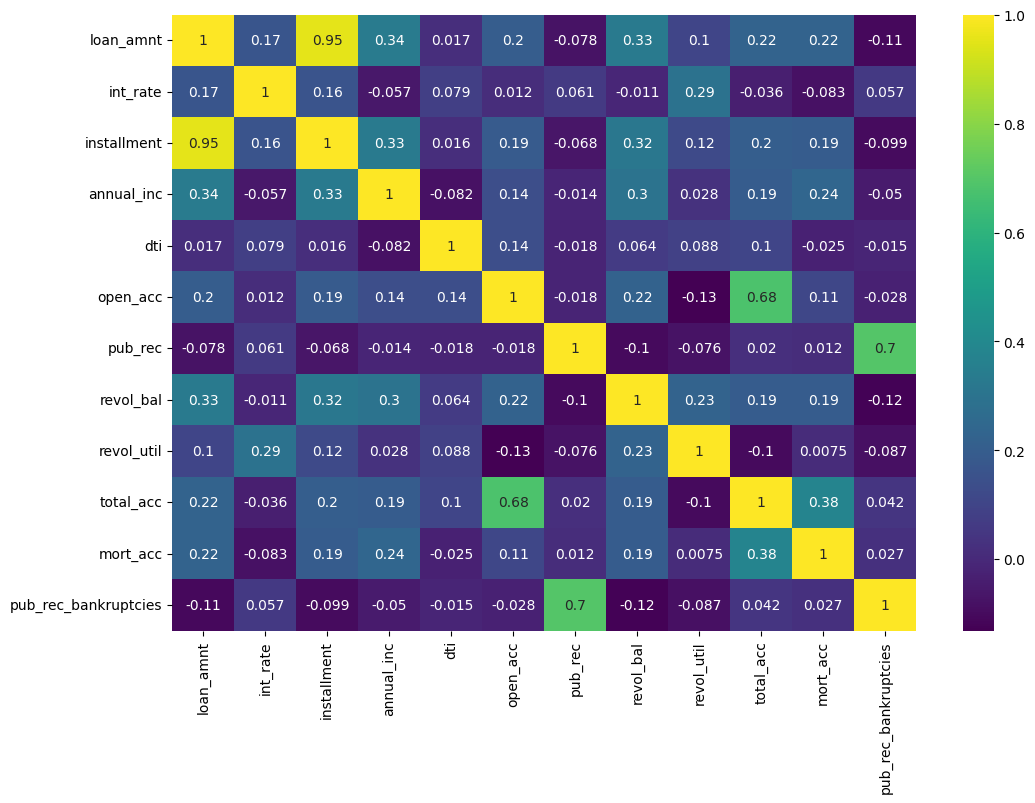

In [9]:
data['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count',
    width=500, height=350
)
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

We observed a nearly flawless correlation between the "loan_amnt" and "installment" features. We intend to delve deeper into these features. We will display their descriptions and generate a scatterplot to visualize their relationship.

Is this correlation logical?
Is it possible that there is redundant information within these variables?
✔️ loan_amnt & installment
- installment: The monthly payment that the borrower is required to make if the loan is approved.
- loan_amnt: The initially requested loan amount by the borrower. If the credit department adjusts the loan amount at any point, it will be updated in this value.

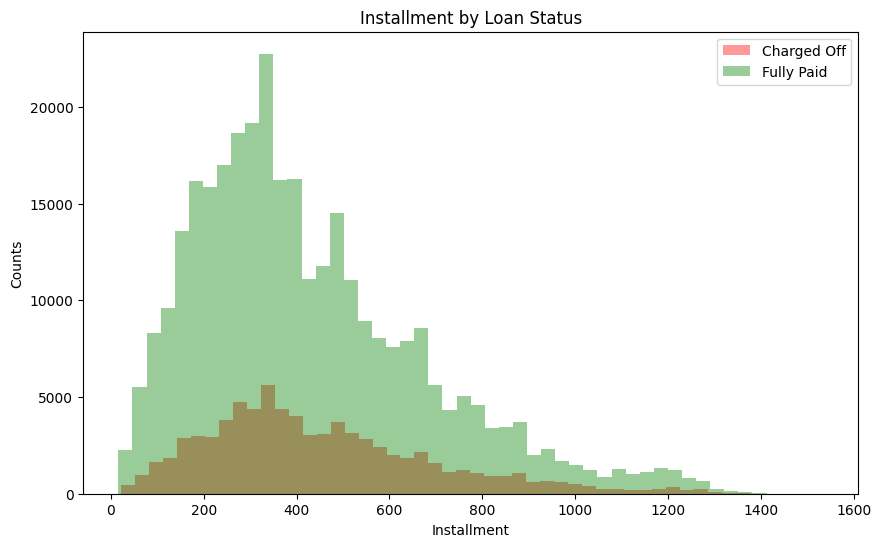

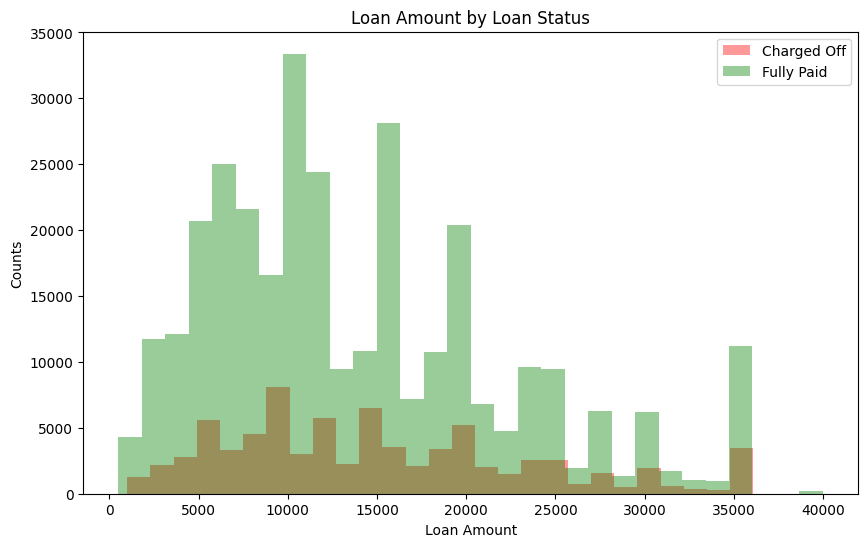

In [17]:
import matplotlib.pyplot as plt

# Histogram for 'installment' by 'loan_status'
plt.figure(figsize=(10, 6))
plt.hist(
    x=data[data['loan_status']=='Charged Off']['installment'],
    bins=50, alpha=0.4, label='Charged Off', color='red'
)
plt.hist(
    x=data[data['loan_status']=='Fully Paid']['installment'],
    bins=50, alpha=0.4, label='Fully Paid', color='green'
)
plt.title('Installment by Loan Status')
plt.xlabel('Installment')
plt.ylabel('Counts')
plt.legend()  # No need to specify a location for the legend
plt.show()

# Histogram for 'loan_amnt' by 'loan_status'
plt.figure(figsize=(10, 6))
plt.hist(
    x=data[data['loan_status']=='Charged Off']['loan_amnt'],
    bins=30, alpha=0.4, label='Charged Off', color='red'
)
plt.hist(
    x=data[data['loan_status']=='Fully Paid']['loan_amnt'],
    bins=30, alpha=0.4, label='Fully Paid', color='green'
)
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Counts')
plt.legend()  # No need to specify a location for the legend
plt.show()


In [24]:
print(f"GRADE unique: {data.grade.unique()}")
print(f"SUB_GRADE unique: {data.sub_grade.unique()}")

GRADE unique: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
SUB_GRADE unique: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


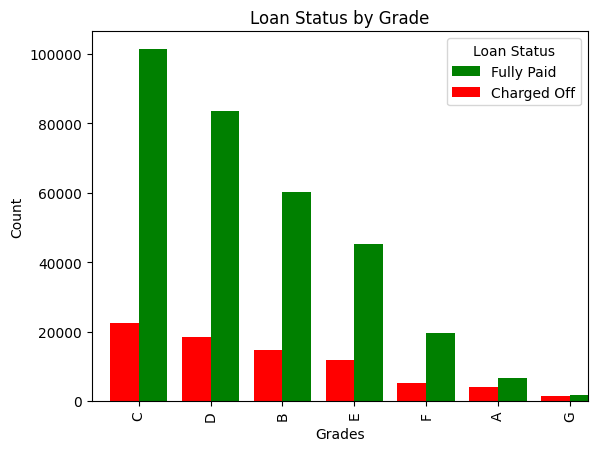

In [27]:
import matplotlib.pyplot as plt

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'grade'].value_counts()
charged_off = data.loc[data['loan_status']=='Charged Off', 'grade'].value_counts()

# Create bar plots for 'Fully Paid' and 'Charged Off' grades
fully_paid.plot.bar(width=0.4, label='Fully Paid', color='green', position=0, legend=True)
charged_off.plot.bar(width=0.4, label='Charged Off', color='red', position=1, legend=True)

# Customize the plot
plt.title("Loan Status by Grade")
plt.xlabel('Grades')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Show the legend
plt.legend(title='Loan Status', loc='upper right')

# Show the plot
plt.show()


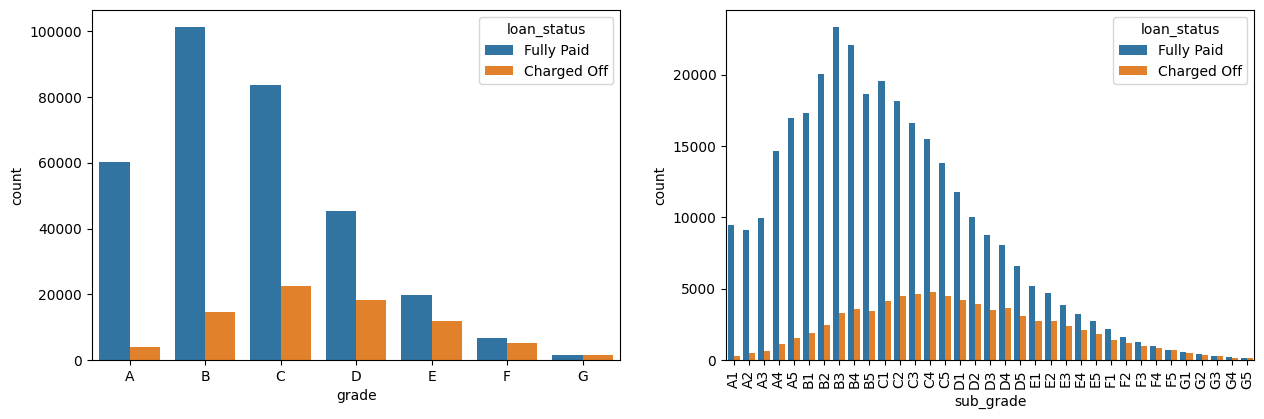

In [28]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

It appears that subgrades F and G have a lower frequency of repayment. Isolate these subgrades and create a new count plot specifically for them.

<Axes: xlabel='sub_grade', ylabel='count'>

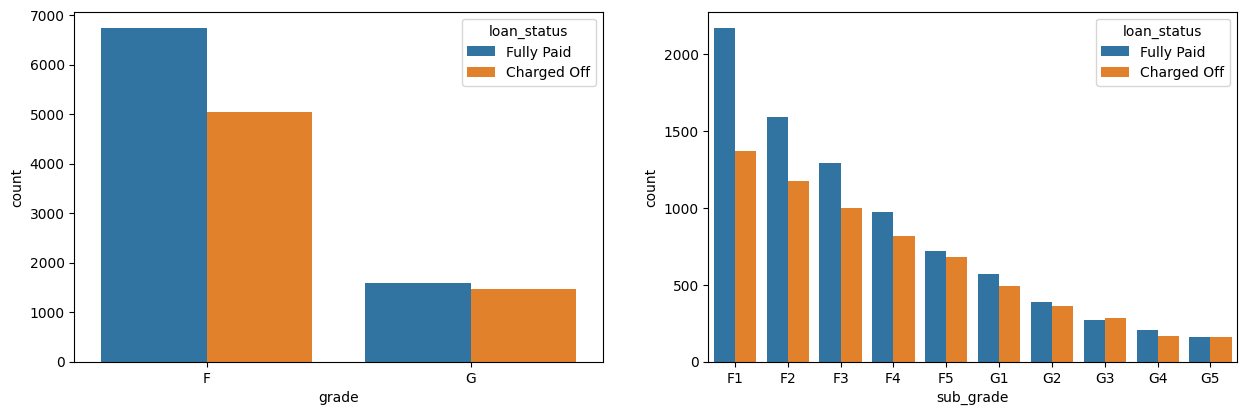

In [29]:
df = data[(data.grade == 'F') | (data.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)

term, home_ownership, verification_status & purpose¶
- term: The number of payments on the loan. Values are in months and can be either 36 or 60.
- home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
- verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified
- purpose: A category provided by the borrower for the loan request.

In [30]:
data['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

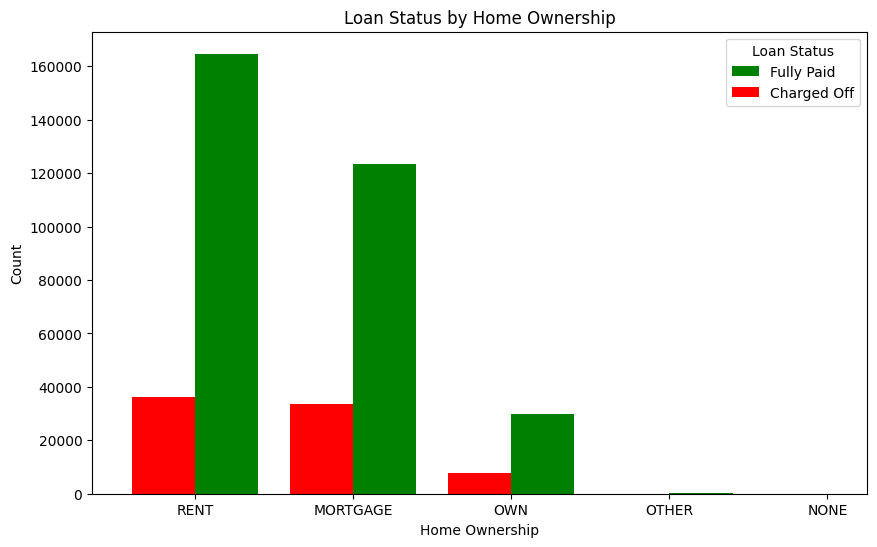

In [32]:
import matplotlib.pyplot as plt

# Filter the data for 'Fully Paid' and 'Charged Off' loan statuses
fully_paid_data = data[data['loan_status'] == 'Fully Paid']
charged_off_data = data[data['loan_status'] == 'Charged Off']

# Create bar plots for 'home_ownership' for 'Fully Paid' and 'Charged Off'
fully_paid_counts = fully_paid_data['home_ownership'].value_counts()
charged_off_counts = charged_off_data['home_ownership'].value_counts()

# Plot for 'Fully Paid'
plt.figure(figsize=(10, 6))
fully_paid_counts.plot(kind='bar', color='green', width=0.4, label='Fully Paid', position=0)

# Plot for 'Charged Off'
charged_off_counts.plot(kind='bar', color='red', width=0.4, label='Charged Off', position=1)

# Customize the plot
plt.title("Loan Status by Home Ownership")
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Show the legend
plt.legend(title='Loan Status', loc='upper right')

# Show the plot
plt.show()


In [33]:
data.loc[(data.home_ownership == 'ANY') | (data.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'
data.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

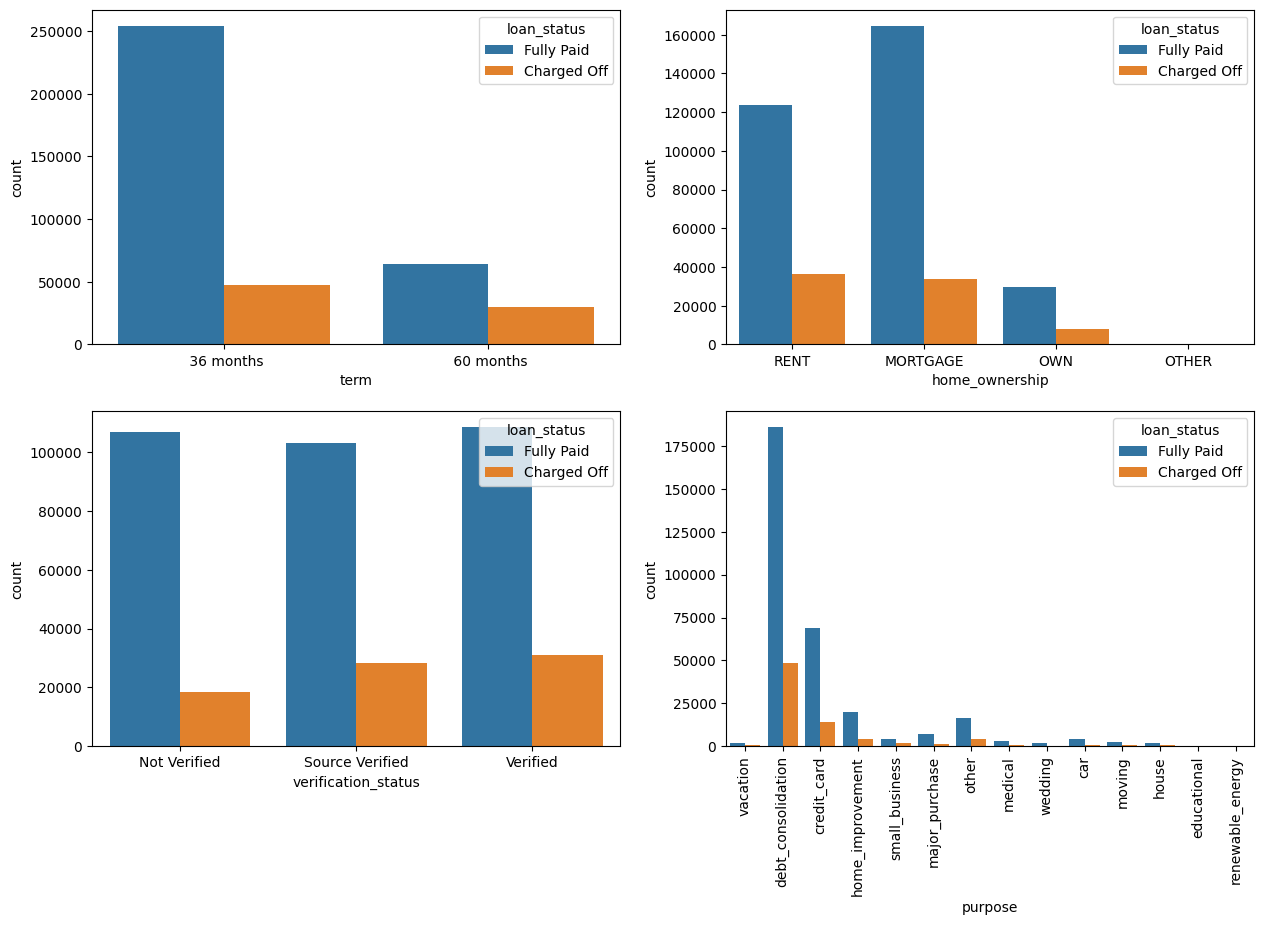

In [34]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=data, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=data, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [35]:
data.loc[data['home_ownership']=='OTHER', 'loan_status'].value_counts()

Fully Paid     123
Charged Off     23
Name: loan_status, dtype: int64

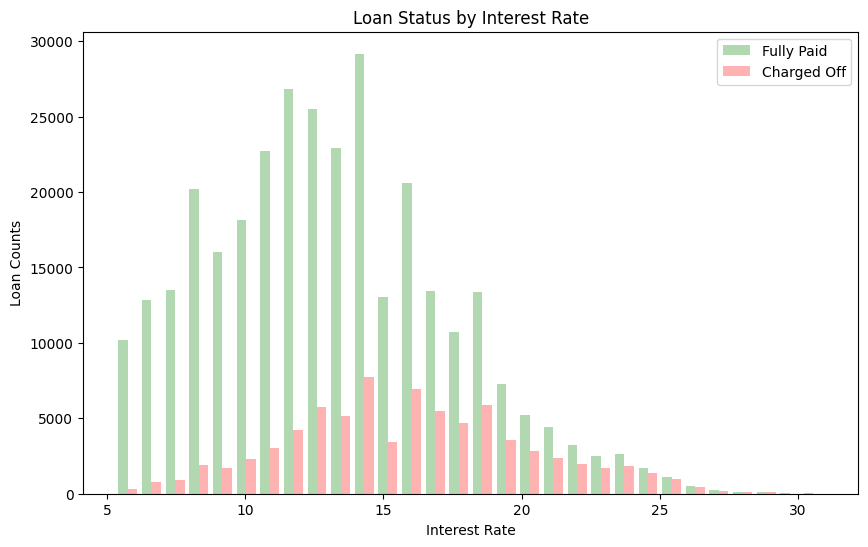

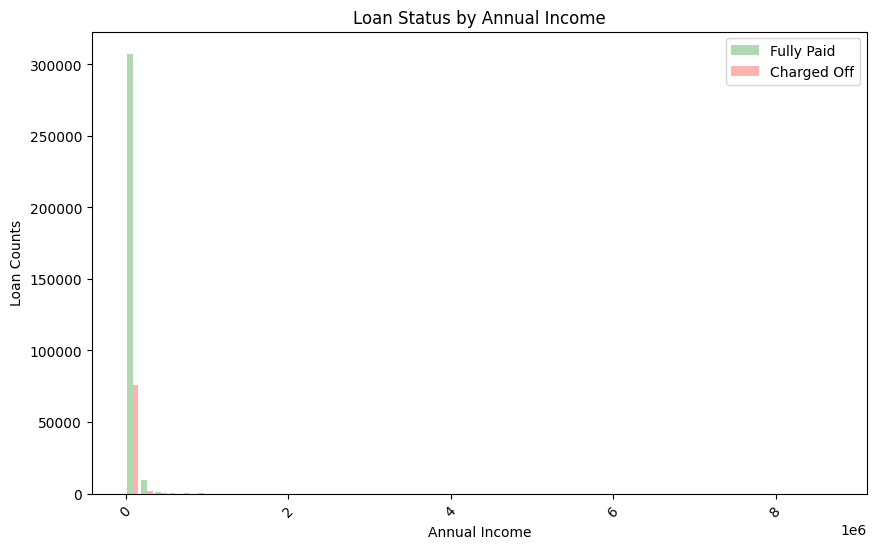

In [38]:
import matplotlib.pyplot as plt

# Histogram for 'int_rate' by 'loan_status'
plt.figure(figsize=(10, 6))
plt.hist(
    x=[data[data['loan_status']=='Fully Paid']['int_rate'], data[data['loan_status']=='Charged Off']['int_rate']],
    bins=30, alpha=0.3, label=['Fully Paid', 'Charged Off'], color=['green', 'red']
)
plt.title('Loan Status by Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Counts')
plt.legend(loc='best')  # Use 'best' as the location for the legend

# Histogram for 'annual_inc' by 'loan_status'
plt.figure(figsize=(10, 6))
plt.hist(
    x=[data[data['loan_status']=='Fully Paid']['annual_inc'], data[data['loan_status']=='Charged Off']['annual_inc']],
    bins=50, alpha=0.3, label=['Fully Paid', 'Charged Off'], color=['green', 'red']
)
plt.title('Loan Status by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Counts')
plt.xticks(rotation=45)
plt.legend(loc='best')  # Use 'best' as the location for the legend

# Show the plots
plt.show()


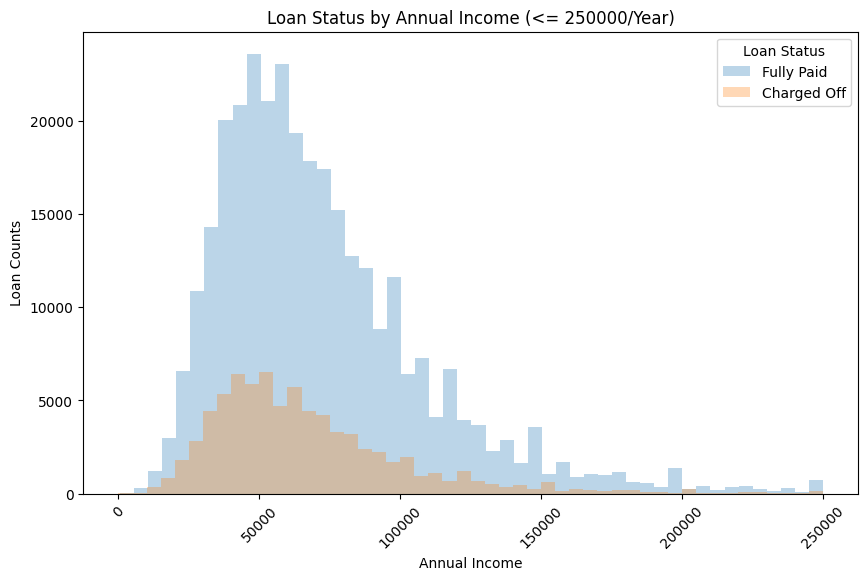

In [40]:
import matplotlib.pyplot as plt

# Filter the data for 'annual_inc' less than or equal to 250000
filtered_data = data[data['annual_inc'] <= 250000]

# Create a histogram for 'annual_inc' by 'loan_status'
plt.figure(figsize=(10, 6))
for loan_status in filtered_data['loan_status'].unique():
    plt.hist(
        filtered_data[filtered_data['loan_status'] == loan_status]['annual_inc'],
        bins=50, alpha=0.3, label=loan_status
    )

# Customize the plot
plt.title("Loan Status by Annual Income (<= 250000/Year)")
plt.xlabel('Annual Income')
plt.ylabel('Loan Counts')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', loc='upper right')

# Show the plot
plt.show()


In [41]:
print((data[data.annual_inc >= 250000].shape[0] / data.shape[0]) * 100)
print((data[data.annual_inc >= 1000000].shape[0] / data.shape[0]) * 100)

1.0294674645860162
0.018937959245511705


In [42]:
data.loc[data.annual_inc >= 1000000, 'loan_status'].value_counts()

Fully Paid     65
Charged Off    10
Name: loan_status, dtype: int64

In [43]:
data.loc[data.annual_inc >= 250000, 'loan_status'].value_counts()

Fully Paid     3509
Charged Off     568
Name: loan_status, dtype: int64

- It seems that loans with high intersest rate are more likely to be unpaid.
- Only 75 (less then) borrowers have an annual income more than 1 million, and 4077

In [44]:
print(data.emp_title.isna().sum())
print(data.emp_title.nunique())

22927
173105


In [45]:
data['emp_title'].value_counts()[:20]

Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
Name: emp_title, dtype: int64

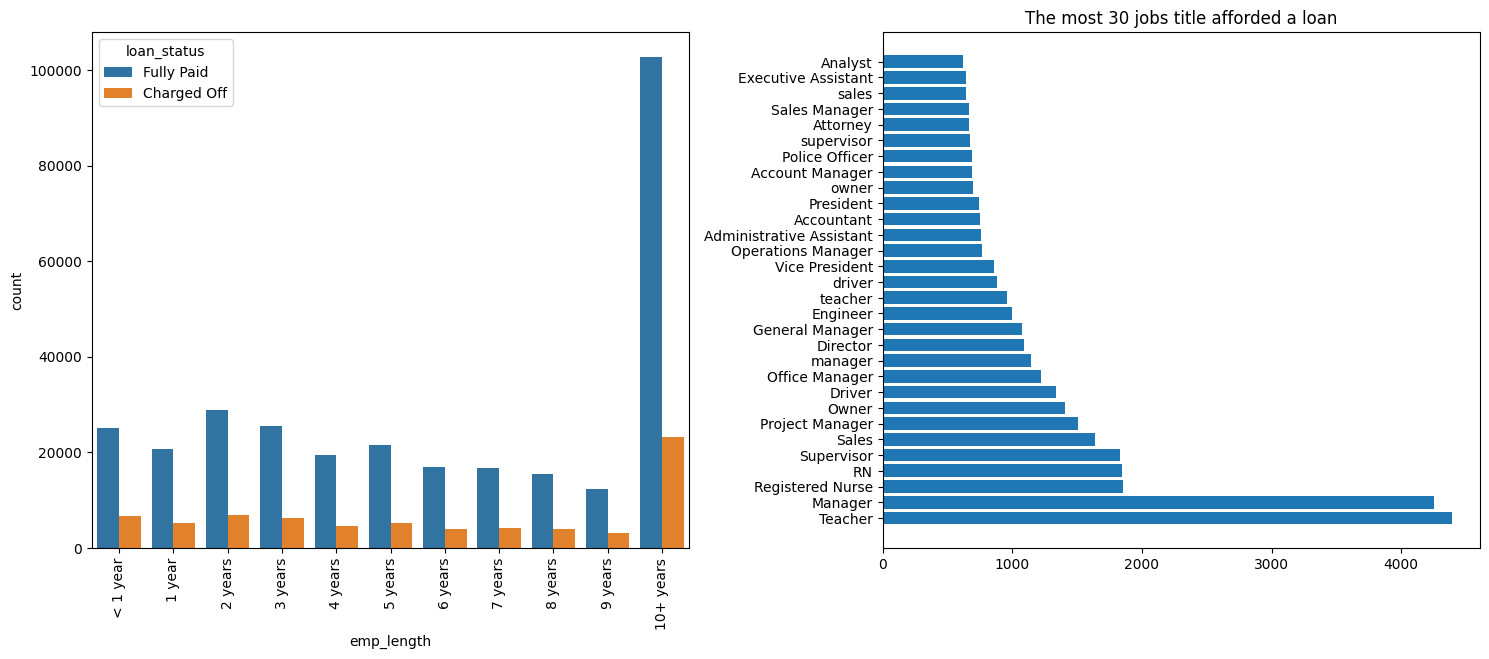

In [46]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

issue_d, earliest_cr_line
- issue_d: The month which the loan was funded
- earliest_cr_line: The month the borrower's earliest reported credit line was opened

In [47]:
data['earliest_cr_line'].value_counts()

Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Jul-1958       1
Nov-1957       1
Jan-1953       1
Jul-1955       1
Aug-1959       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [48]:
data['issue_d'] = pd.to_datetime(data['issue_d'])
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])

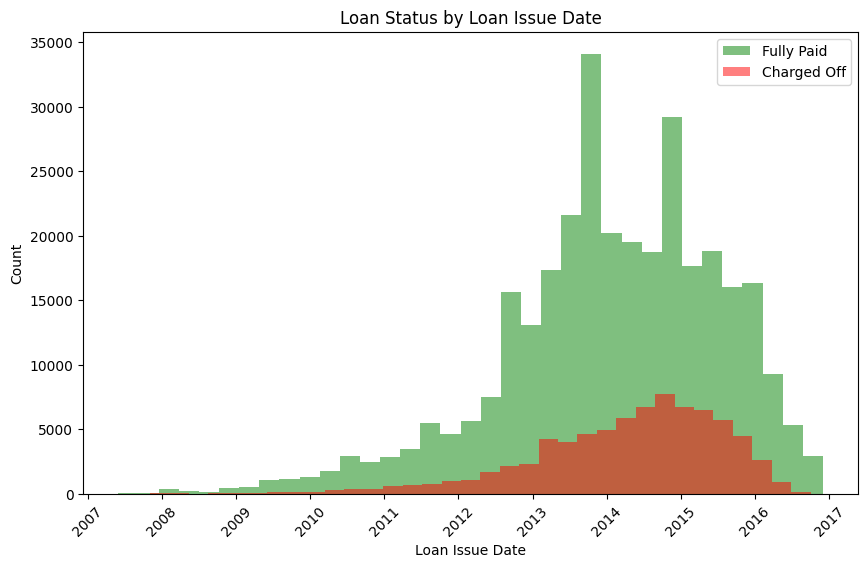

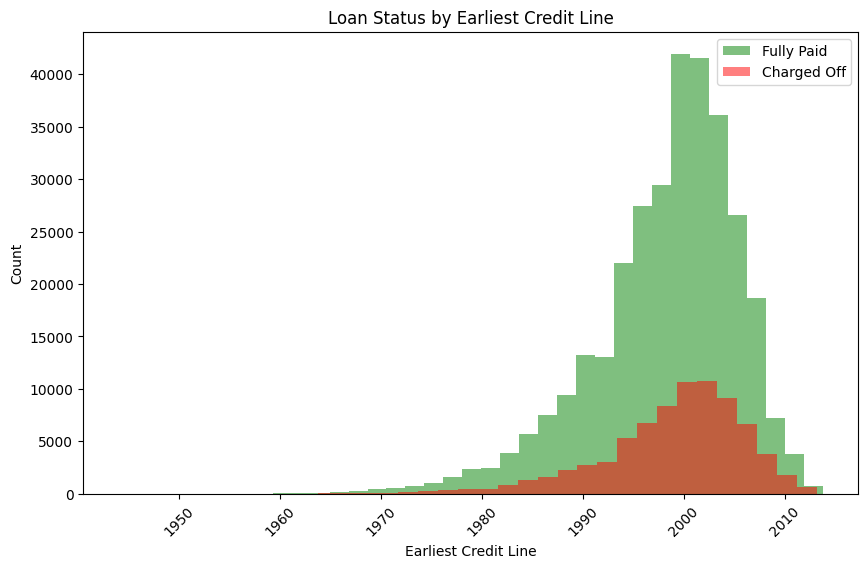

In [50]:
import matplotlib.pyplot as plt

# Create histograms for 'issue_d' by 'loan_status'
plt.figure(figsize=(10, 6))
fully_paid_data = data[data['loan_status']=='Fully Paid']['issue_d']
charged_off_data = data[data['loan_status']=='Charged Off']['issue_d']
plt.hist(fully_paid_data, bins=35, alpha=0.5, label='Fully Paid', color='green')
plt.hist(charged_off_data, bins=35, alpha=0.5, label='Charged Off', color='red')

# Customize the plot
plt.title("Loan Status by Loan Issue Date")
plt.xlabel('Loan Issue Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Create histograms for 'earliest_cr_line' by 'loan_status'
plt.figure(figsize=(10, 6))
fully_paid_data = data[data['loan_status']=='Fully Paid']['earliest_cr_line']
charged_off_data = data[data['loan_status']=='Charged Off']['earliest_cr_line']
plt.hist(fully_paid_data, bins=35, alpha=0.5, label='Fully Paid', color='green')
plt.hist(charged_off_data, bins=35, alpha=0.5, label='Charged Off', color='red')

# Customize the plot
plt.title("Loan Status by Earliest Credit Line")
plt.xlabel('Earliest Credit Line')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Show the plots
plt.show()


In [51]:
data.title.isna().sum()

1755

In [52]:
data['title'] = data.title.str.lower()

In [53]:
data.title.value_counts()[:10]

debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
Name: title, dtype: int64

dti, open_acc, revol_bal, revol_util, & total_acc¶
- dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- open_acc: The number of open credit lines in the borrower's credit file.
- revol_bal: Total credit revolving balance
- revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- total_acc: The total number of credit lines currently in the borrower's credit file

In [54]:
data.dti.value_counts()

0.00     313
14.40    310
19.20    302
16.80    301
18.00    300
        ... 
59.18      1
48.37      1
45.71      1
42.38      1
55.53      1
Name: dti, Length: 4262, dtype: int64

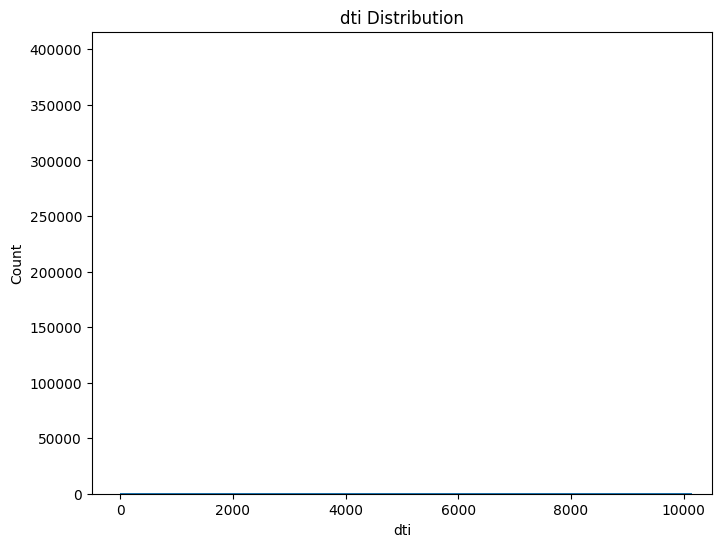

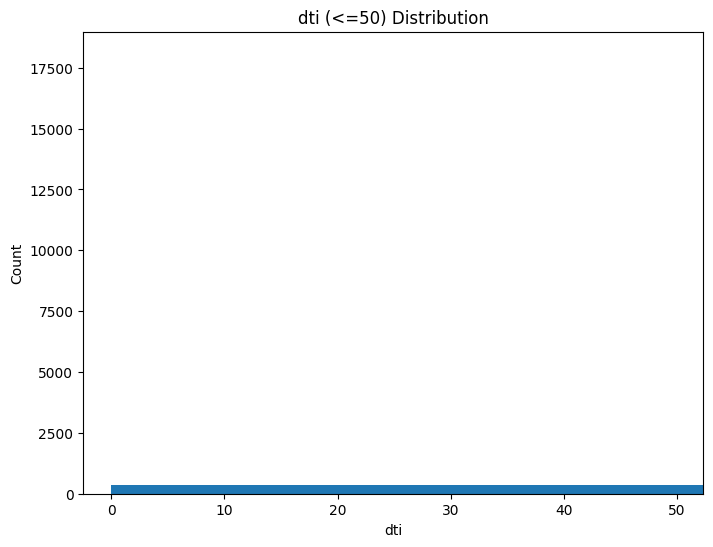

In [56]:
import matplotlib.pyplot as plt

# Create a histogram for 'dti' distribution
plt.figure(figsize=(8, 6))
plt.hist(data['dti'], bins=50, width=350, height=350)
plt.title("dti Distribution")
plt.xlabel('dti')
plt.ylabel('Count')

# Create a histogram for 'dti' distribution (<= 50)
plt.figure(figsize=(8, 6))
plt.hist(data[data['dti'] <= 50]['dti'], bins=50, width=350, height=350)
plt.title("dti (<=50) Distribution")
plt.xlabel('dti')
plt.ylabel('Count')

# Show the plots
plt.show()


In [57]:
print(data[data['dti']>=40].shape)

(296, 27)


In [58]:
data.loc[data['dti']>=50, 'loan_status'].value_counts()


Fully Paid     26
Charged Off     9
Name: loan_status, dtype: int64

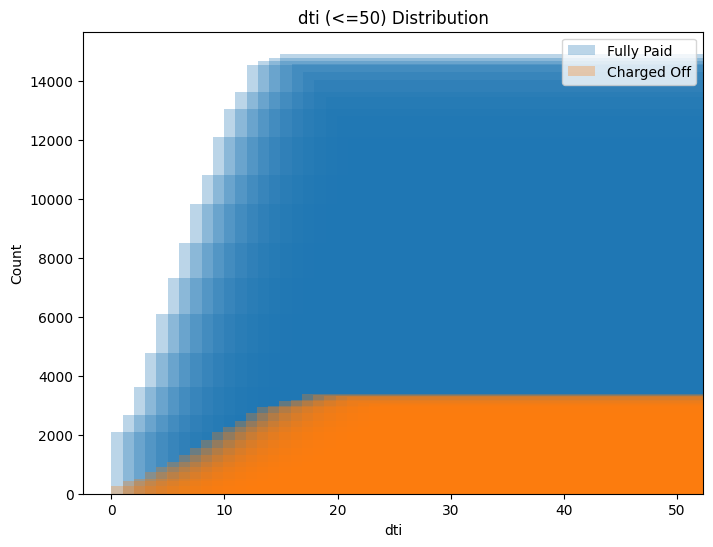

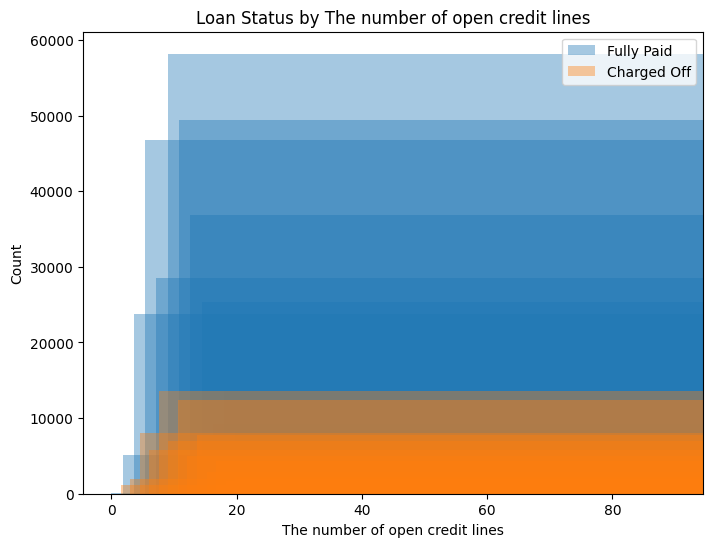

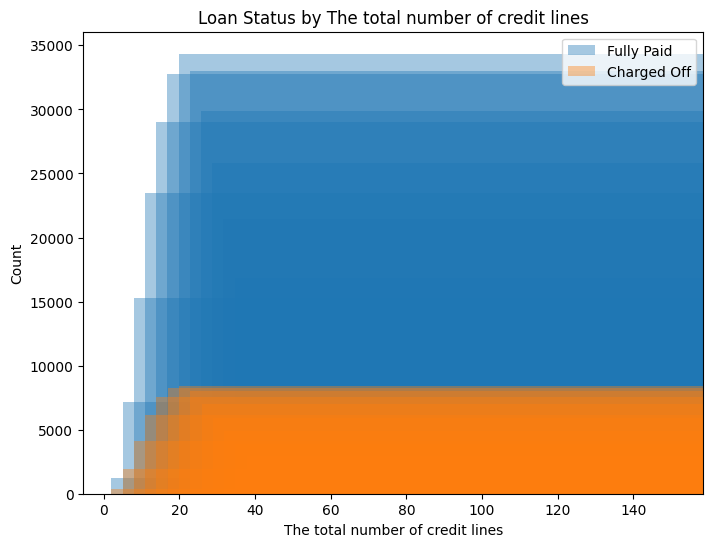

In [61]:
import matplotlib.pyplot as plt

# Create a histogram for 'dti' distribution (<= 50)
plt.figure(figsize=(8, 6))
for loan_status in data['loan_status'].unique():
    plt.hist(
        data[(data['dti'] <= 50) & (data['loan_status'] == loan_status)]['dti'],
        bins=50, width=300, alpha=0.3, label=loan_status
    )
plt.title("dti (<=50) Distribution")
plt.xlabel('dti')
plt.ylabel('Count')
plt.legend(loc='upper right')  # Use 'upper right' instead of 'top'

# Create a histogram for 'open_acc' by 'loan_status'
plt.figure(figsize=(8, 6))
for loan_status in data['loan_status'].unique():
    plt.hist(
        data[data['loan_status'] == loan_status]['open_acc'],
        bins=50, width=300, alpha=0.4, label=loan_status
    )
plt.title("Loan Status by The number of open credit lines")
plt.xlabel('The number of open credit lines')
plt.ylabel('Count')
plt.legend(loc='upper right')  # Use 'upper right' instead of 'top'

# Create a histogram for 'total_acc' by 'loan_status'
plt.figure(figsize=(8, 6))
for loan_status in data['loan_status'].unique():
    plt.hist(
        data[data['loan_status'] == loan_status]['total_acc'],
        bins=50, width=300, alpha=0.4, label=loan_status
    )
plt.title("Loan Status by The total number of credit lines")
plt.xlabel('The total number of credit lines')
plt.ylabel('Count')
plt.legend(loc='upper right')  # Use 'upper right' instead of 'top'

# Show the plots
plt.show()


In [62]:
print(data.shape)
print(data[data.open_acc > 40].shape)

(396030, 27)
(217, 27)


In [63]:
print(data.shape)
print(data[data.total_acc > 80].shape)

(396030, 27)
(266, 27)


In [64]:
print(data.shape)
print(data[data.revol_util > 120].shape)

(396030, 27)
(27, 27)


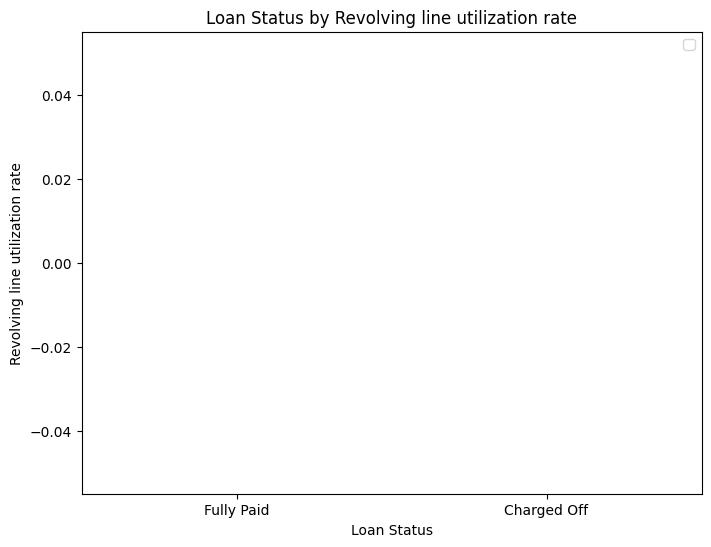

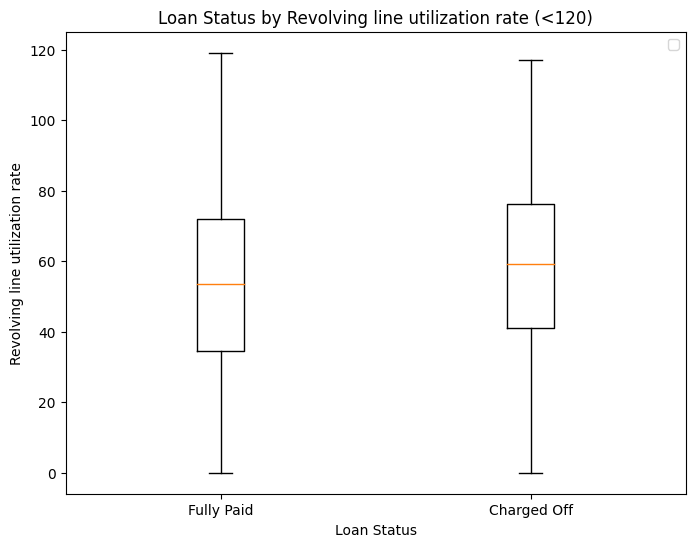

In [69]:
import matplotlib.pyplot as plt

# Create a boxplot for 'revol_util' by 'loan_status'
plt.figure(figsize=(8, 6))
boxplot_data = []
labels = []
for loan_status in data['loan_status'].unique():
    boxplot_data.append(data[data['loan_status'] == loan_status]['revol_util'])
    labels.append(loan_status)

plt.boxplot(boxplot_data, labels=labels)
plt.title("Loan Status by Revolving line utilization rate")
plt.xlabel('Loan Status')
plt.ylabel('Revolving line utilization rate')
plt.legend(loc='upper right')

# Create a boxplot for 'revol_util' (<120) by 'loan_status'
plt.figure(figsize=(8, 6))
boxplot_data = []
labels = []
for loan_status in data['loan_status'].unique():
    boxplot_data.append(data[(data['revol_util'] < 120) & (data['loan_status'] == loan_status)]['revol_util'])
    labels.append(loan_status)

plt.boxplot(boxplot_data, labels=labels)
plt.title("Loan Status by Revolving line utilization rate (<120)")
plt.xlabel('Loan Status')
plt.ylabel('Revolving line utilization rate')
plt.legend(loc='upper right')

# Show the plots
plt.show()


In [70]:
data[data.revol_util > 200]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
137211,3500.0,36 months,12.49,117.08,B,B4,Budget Analyst,10+ years,RENT,45000.0,...,2.0,0.0,2677.0,892.3,9.0,f,INDIVIDUAL,0.0,0.0,"12506 Connie Burg\r\nVelasquezfort, TN 00813"


In [71]:
print(data.shape)
print(data[data.revol_bal > 250000].shape)

(396030, 27)
(397, 27)


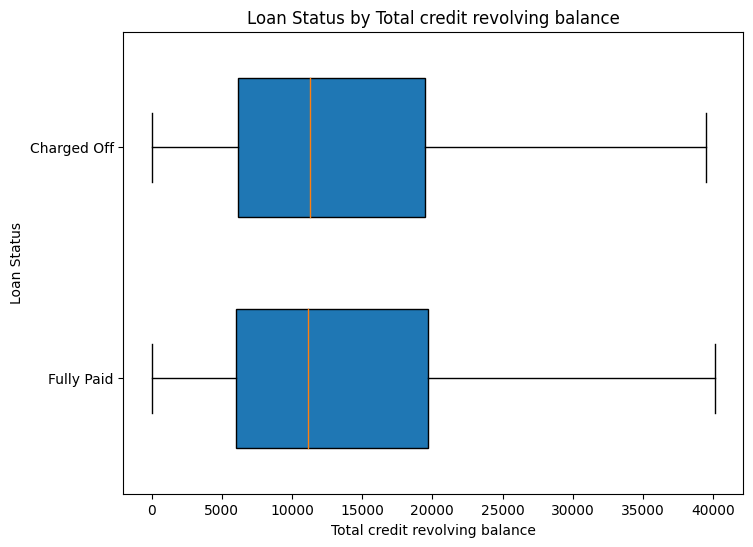

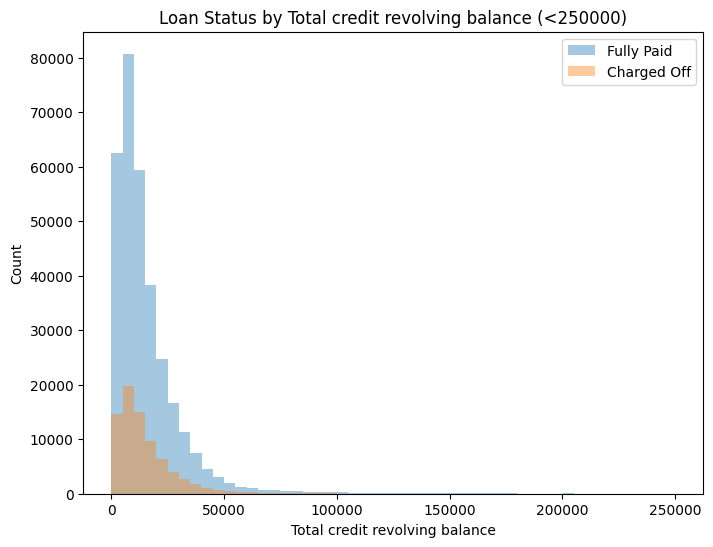

In [77]:
import matplotlib.pyplot as plt

# Create a boxplot for 'revol_bal' by 'loan_status'
plt.figure(figsize=(8, 6))
positions = range(1, len(data['loan_status'].unique()) + 1)
labels = list(data['loan_status'].unique())
for i, loan_status in enumerate(data['loan_status'].unique()):
    plt.boxplot(
        data[data['loan_status'] == loan_status]['revol_bal'],
        vert=False, positions=[positions[i]], labels=[labels[i]],
        widths=0.6, showfliers=False, patch_artist=True
    )

plt.title("Loan Status by Total credit revolving balance")
plt.xlabel('Total credit revolving balance')
plt.ylabel('Loan Status')

# Create a histogram for 'revol_bal' (<250000) by 'loan_status'
plt.figure(figsize=(8, 6))
for loan_status in data['loan_status'].unique():
    plt.hist(
        data[(data['revol_bal'] <= 250000) & (data['loan_status'] == loan_status)]['revol_bal'],
        bins=50, alpha=0.4, label=loan_status
    )

plt.title("Loan Status by Total credit revolving balance (<250000)")
plt.xlabel('Total credit revolving balance')
plt.ylabel('Count')
plt.legend(loc='upper right')

# Show the plots
plt.show()


In [78]:
data.loc[data.revol_bal > 250000, 'loan_status'].value_counts()

Fully Paid     351
Charged Off     46
Name: loan_status, dtype: int64

A lower debt-to-income ratio (dti) appears to be associated with a higher likelihood of loan default.
There are only 217 borrowers who have over 40 open credit lines.
Only 266 borrowers have more than 80 credit lines in their credit file.

pub_rec, initial_list_status, application_type, mort_acc, & pub_rec_bankruptcies¶
- pub_rec: Number of derogatory public records
initial_list_status: The initial listing status of the loan. Possible values are – W, F
- application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers
- mort_acc: Number of mortgage accounts
- pub_rec_bankruptcies: Number of public record bankruptcies

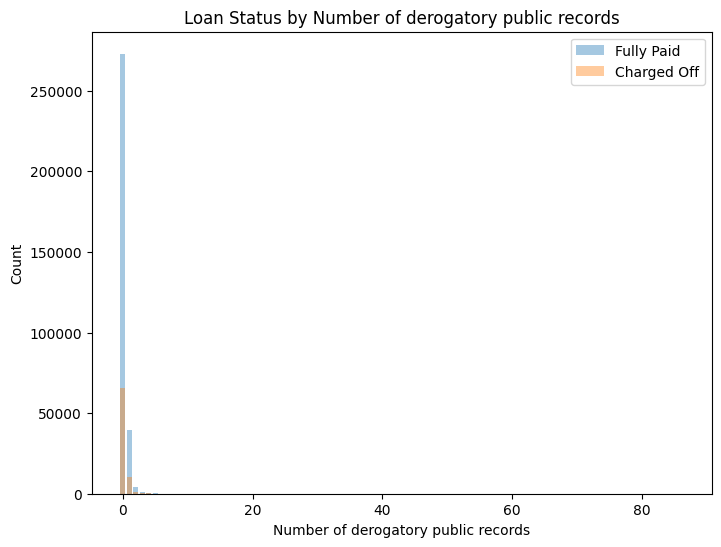

In [80]:
import matplotlib.pyplot as plt

xlabel = 'Number of derogatory public records'
title = "Loan Status by Number of derogatory public records"

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'pub_rec'].value_counts()
charged_off = data.loc[data['loan_status']=='Charged Off', 'pub_rec'].value_counts()

# Create bar plots for 'Fully Paid' and 'Charged Off' counts
plt.figure(figsize=(8, 6))
plt.bar(fully_paid.index, fully_paid.values, alpha=0.4, label='Fully Paid')
plt.bar(charged_off.index, charged_off.values, alpha=0.4, label='Charged Off')
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()


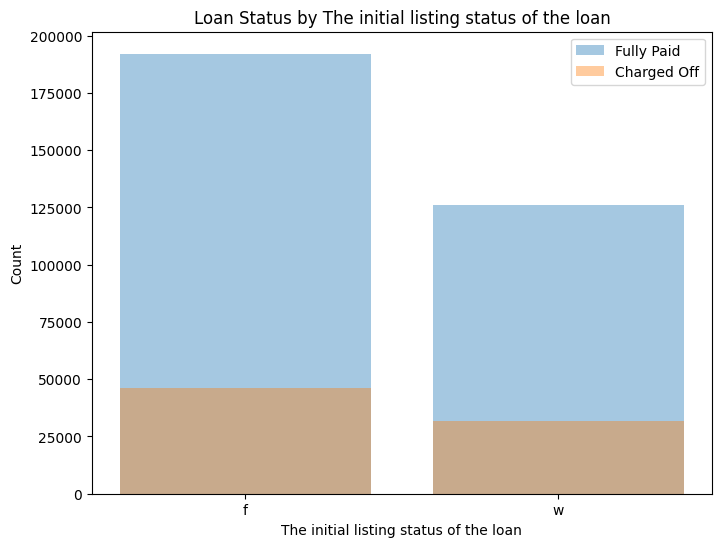

In [81]:
import matplotlib.pyplot as plt

xlabel = "The initial listing status of the loan"
title = "Loan Status by The initial listing status of the loan"

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'initial_list_status'].value_counts()
charged_off = data.loc[data['loan_status']=='Charged Off', 'initial_list_status'].value_counts()

# Create bar plots for 'Fully Paid' and 'Charged Off' counts
plt.figure(figsize=(8, 6))
plt.bar(fully_paid.index, fully_paid.values, alpha=0.4, label='Fully Paid')
plt.bar(charged_off.index, charged_off.values, alpha=0.4, label='Charged Off')
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()


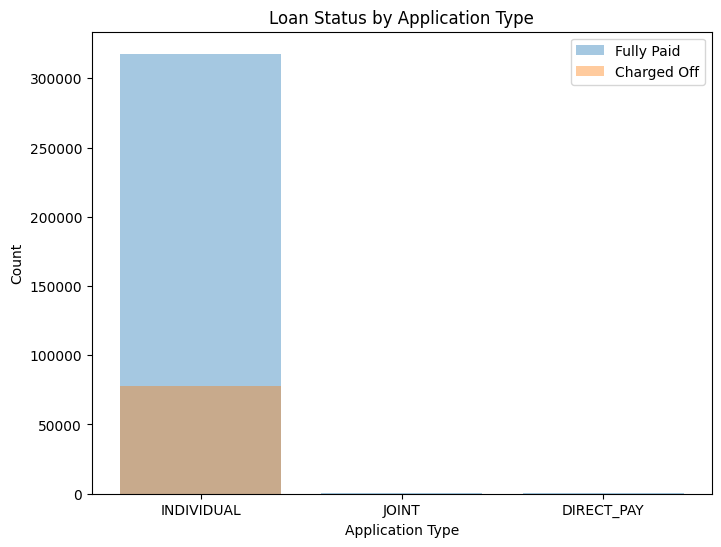

In [82]:
import matplotlib.pyplot as plt

fully_paid = data.loc[data['loan_status'] == 'Fully Paid', 'application_type'].value_counts()
charged_off = data.loc[data['loan_status'] == 'Charged Off', 'application_type'].value_counts()

# Create bar plots for 'Fully Paid' and 'Charged Off' counts
plt.figure(figsize=(8, 6))
plt.bar(fully_paid.index, fully_paid.values, alpha=0.4, label='Fully Paid')
plt.bar(charged_off.index, charged_off.values, alpha=0.4, label='Charged Off')
plt.title("Loan Status by Application Type")
plt.xlabel("Application Type")
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()


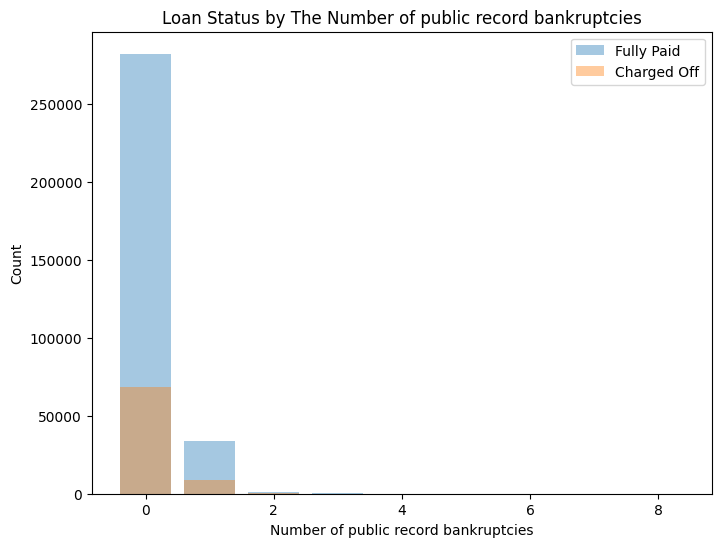

In [83]:
import matplotlib.pyplot as plt

xlabel = "Number of public record bankruptcies"
title = "Loan Status by The Number of public record bankruptcies"

fully_paid = data.loc[data['loan_status'] == 'Fully Paid', 'pub_rec_bankruptcies'].value_counts()
charged_off = data.loc[data['loan_status'] == 'Charged Off', 'pub_rec_bankruptcies'].value_counts()

# Create bar plots for 'Fully Paid' and 'Charged Off' counts
plt.figure(figsize=(8, 6))
plt.bar(fully_paid.index, fully_paid.values, alpha=0.4, label='Fully Paid')
plt.bar(charged_off.index, charged_off.values, alpha=0.4, label='Charged Off')
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()


In [84]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [85]:
data['pub_rec'] = data.pub_rec.apply(pub_rec)
data['mort_acc'] = data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies'] = data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

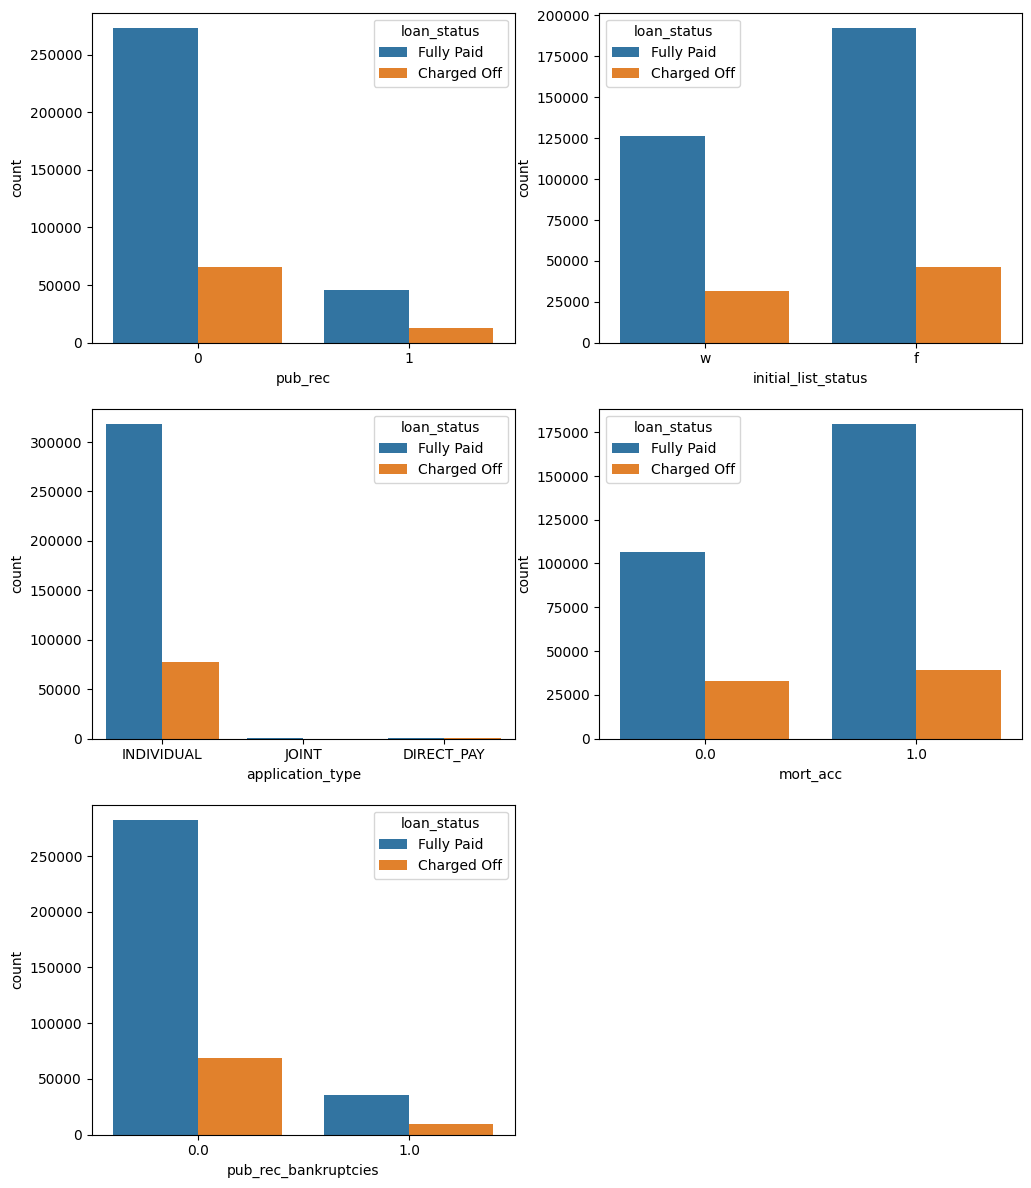

In [86]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=data, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=data, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=data, hue='loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=data, hue='loan_status')

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=data, hue='loan_status')

**How numeric features correlate with the target variable?**

In [87]:
data['loan_status'] = data.loan_status.map({'Fully Paid':1, 'Charged Off':0})

<ipython-input-88-13d2860db690>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()['loan_status'].drop('loan_status').sort_values()


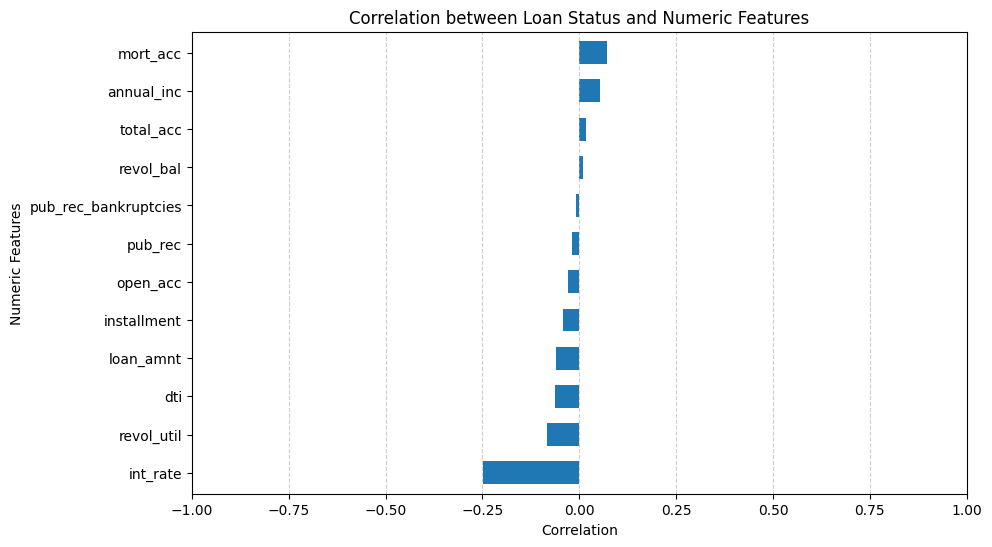

In [88]:
import matplotlib.pyplot as plt

# Calculate the correlation between loan_status and numeric features
correlation = data.corr()['loan_status'].drop('loan_status').sort_values()

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
correlation.plot(kind='barh', width=0.6)
plt.title("Correlation between Loan Status and Numeric Features")
plt.xlabel("Correlation")
plt.ylabel("Numeric Features")
plt.xlim(-1, 1)  # Set the x-axis limit to -1 to 1 for correlation values
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add gridlines for reference
plt.show()




Conclusion:
It is observed that there are essentially three categories of features:

- Applicant-related features, which include demographic variables like occupation and employment details.
- Loan-related features, which encompass characteristics such as loan amount, interest rate, and loan purpose.

**Outliers Detection and Removing**

Remove or fill any missing data.
Remove unnecessary or repetitive features.
Convert categorical string features to dummy variables.

In [89]:
print(f"The Length of the data: {data.shape}")

The Length of the data: (396030, 27)


In [90]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '22927' ==> '5.789%'
'emp_length': number of missing values '18301' ==> '4.621%'
'title': number of missing values '1755' ==> '0.443%'
'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [91]:
data.emp_title.nunique()

173105

In practical terms, there is an excessive number of unique job titles to consider converting into a dummy variable feature. Therefore, it's advisable to eliminate the 'emp_title' column.

In [92]:
data.drop('emp_title', axis=1, inplace=True)

In [93]:
data.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [94]:
for year in data.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{data[data.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

10+ years years in this position:
1    0.815814
0    0.184186
Name: loan_status, dtype: float64
4 years years in this position:
1    0.807615
0    0.192385
Name: loan_status, dtype: float64
< 1 year years in this position:
1    0.793128
0    0.206872
Name: loan_status, dtype: float64
6 years years in this position:
1    0.810806
0    0.189194
Name: loan_status, dtype: float64
9 years years in this position:
1    0.79953
0    0.20047
Name: loan_status, dtype: float64
2 years years in this position:
1    0.806738
0    0.193262
Name: loan_status, dtype: float64
3 years years in this position:
1    0.804769
0    0.195231
Name: loan_status, dtype: float64
8 years years in this position:
1    0.80024
0    0.19976
Name: loan_status, dtype: float64
7 years years in this position:
1    0.805226
0    0.194774
Name: loan_status, dtype: float64
5 years years in this position:
1    0.807813
0    0.192187
Name: loan_status, dtype: float64
1 year years in this position:
1    0.800865
0    0.199135
Na

The charge-off rates exhibit very similar patterns across all employment lengths. As a result, we will remove the 'emp_length' column.

In [95]:
data.drop('emp_length', axis=1, inplace=True)

In [96]:
data.title.value_counts().head()

debt consolidation         168108
credit card refinancing     51781
home improvement            17117
other                       12993
consolidation                5583
Name: title, dtype: int64

In [97]:
data.purpose.value_counts().head()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
Name: purpose, dtype: int64

The title column is simply a string subcategory/description of the purpose column. So we are going to drop the title column.

In [98]:
data.drop('title', axis=1, inplace=True)

mort_acc¶
There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach!

Let's review the other columsn to see which most highly correlates to mort_acc

In [99]:
data.mort_acc.value_counts()

1.0    218458
0.0    139777
Name: mort_acc, dtype: int64

In [100]:
data.mort_acc.isna().sum()

37795

<ipython-input-103-ff0da91858cd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['mort_acc'].drop('mort_acc').sort_values().plot.barh()


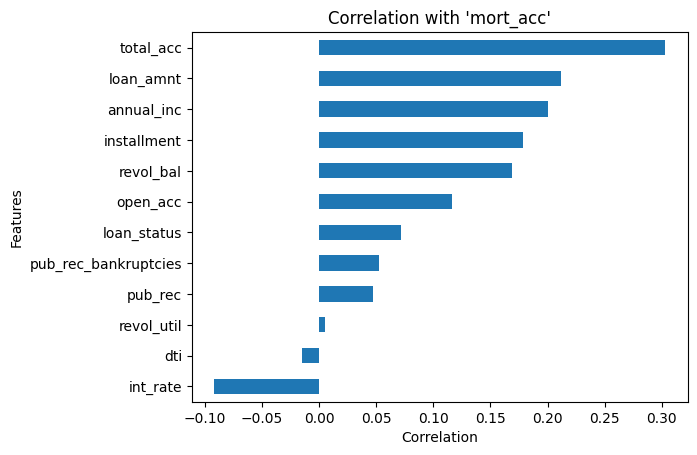

In [103]:
import matplotlib.pyplot as plt

data.corr()['mort_acc'].drop('mort_acc').sort_values().plot.barh()
plt.title("Correlation with 'mort_acc'")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.show()


Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:

In [104]:
total_acc_avg = data.groupby(by='total_acc').mean().mort_acc

<ipython-input-104-584fae57b31c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg = data.groupby(by='total_acc').mean().mort_acc


In [105]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [106]:
data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

These two features have missing data points, but they account for less than 0.5% of the total data. So we are going to remove the rows that are missing those values in those columns with dropna().

In [107]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'revol_util': number of missing values '276' ==> '0.070%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [108]:
data.dropna(inplace=True)

In [109]:
data.shape

(395219, 24)

Categorical Variables and Dummy Variables

In [110]:
print([column for column in data.columns if data[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'address']


In [111]:
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [112]:
term_values = {' 36 months': 36, ' 60 months': 60}
data['term'] = data.term.map(term_values)

In [113]:
data.term.unique()

array([36, 60])

grade & sub_grade¶
We know that grade is just a sub feature of sub_grade, So we are goinig to drop it.

In [114]:
data.drop('grade', axis=1, inplace=True)

In [115]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status',
           'application_type', 'home_ownership']
data = pd.get_dummies(data, columns=dummies, drop_first=True)

address¶
We are going to feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.

In [116]:
data.address.head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [117]:
data['zip_code'] = data.address.apply(lambda x: x[-5:])

In [118]:
data.zip_code.value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [119]:
data = pd.get_dummies(data, columns=['zip_code'], drop_first=True)

In [120]:
data.drop('address', axis=1, inplace=True)

issue_d
This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [121]:
data.drop('issue_d', axis=1, inplace=True)

In [122]:
data['earliest_cr_line'] = data.earliest_cr_line.dt.year

In [123]:
data.earliest_cr_line.nunique()

65

In [124]:
data.earliest_cr_line.value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: earliest_cr_line, Length: 65, dtype: int64

**Check for duplicates columns & features** --> **Data Preparation**


**Test and Train**

In [125]:
w_p = data.loan_status.value_counts()[0] / data.shape[0]
w_n = data.loan_status.value_counts()[1] / data.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.19615200686201828
Weight of negative values 0.8038479931379817


In [126]:
train, test = train_test_split(data, test_size=0.33, random_state=42)

print(train.shape)
print(test.shape)

(264796, 79)
(130423, 79)


**Removing Outliers**

In [127]:
print(train[train['dti'] <= 50].shape)
print(train.shape)

(264776, 79)
(264796, 79)


In [128]:
print(train.shape)
train = train[train['annual_inc'] <= 250000]
train = train[train['dti'] <= 50]
train = train[train['open_acc'] <= 40]
train = train[train['total_acc'] <= 80]
train = train[train['revol_util'] <= 120]
train = train[train['revol_bal'] <= 250000]
print(train.shape)

(264796, 79)
(262143, 79)


**Normalizing Data**

In [129]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [130]:
X_train.dtypes

loan_amnt         float64
term                int64
int_rate          float64
installment       float64
annual_inc        float64
                   ...   
zip_code_30723      uint8
zip_code_48052      uint8
zip_code_70466      uint8
zip_code_86630      uint8
zip_code_93700      uint8
Length: 78, dtype: object

In [131]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Machine Learning Models Building**

In [132]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [133]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

**Artificial Neural Networks (ANNs)**

In [134]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)

    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [135]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


model = nn_model(
    num_columns=num_columns,
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
8192/8192 [==============================] - 55s 6ms/step - loss: 0.3087 - AUC: 0.8597 - val_loss: 0.2661 - val_AUC: 0.9014
Epoch 2/20
8192/8192 [==============================] - 49s 6ms/step - loss: 0.2912 - AUC: 0.8774 - val_loss: 0.2630 - val_AUC: 0.9030
Epoch 3/20
8192/8192 [==============================] - 50s 6ms/step - loss: 0.2872 - AUC: 0.8815 - val_loss: 0.2615 - val_AUC: 0.9043
Epoch 4/20
8192/8192 [==============================] - 48s 6ms/step - loss: 0.2836 - AUC: 0.8849 - val_loss: 0.2592 - val_AUC: 0.9053
Epoch 5/20
8192/8192 [==============================] - 50s 6ms/step - loss: 0.2819 - AUC: 0.8863 - val_loss: 0.2599 - val_AUC: 0.9054
Epoch 6/20
8192/8192 [==============================] - 48s 6ms/step - loss: 0.2807 - AUC: 0.8879 - val_loss: 0.2618 - val_AUC: 0.9056
Epoch 7/20
8192/8192 [==============================] - 47s 6ms/step - loss: 0.2798 - AUC: 0.8884 - val_loss: 0.2602 - val_AUC: 0.9056
Epoch 8/20
8192/8192 [==============================] -

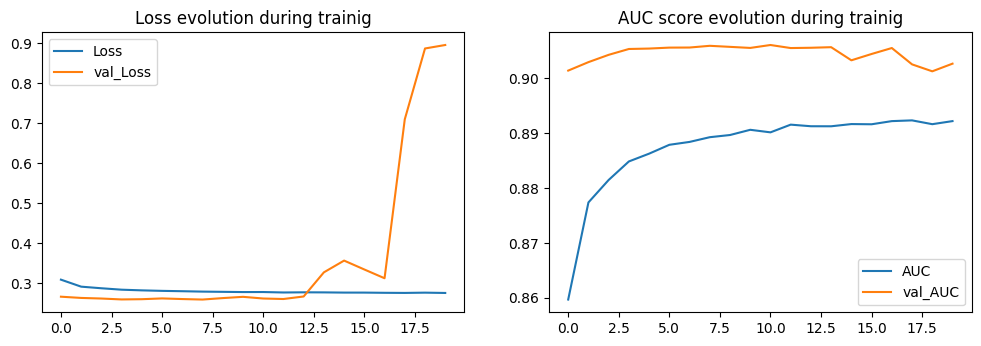

In [136]:
plot_learning_evolution(r)

In [137]:
y_train_pred = model.predict(X_train)
evaluate_nn(y_train, y_train_pred.round(), train=True)

8192/8192 [==============================] - 23s 3ms/step
Train Result:
Accuracy Score: 88.81%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0            1.0  accuracy      macro avg   weighted avg
precision      0.889859       0.887871  0.888088       0.888865       0.888262
recall         0.493216       0.985015  0.888088       0.739115       0.888088
f1-score       0.634662       0.933923  0.888088       0.784293       0.874943
support    51665.000000  210478.000000  0.888088  262143.000000  262143.000000
_______________________________________________
Confusion Matrix: 
 [[ 25482  26183]
 [  3154 207324]]



In [138]:
y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)

4076/4076 [==============================] - 17s 4ms/step
Test Result:
Accuracy Score: 88.78%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0            1.0  accuracy      macro avg   weighted avg
precision      0.882976       0.888435  0.887842       0.885705       0.887368
recall         0.490973       0.984201  0.887842       0.737587       0.887842
f1-score       0.631053       0.933869  0.887842       0.782461       0.874710
support    25480.000000  104943.000000  0.887842  130423.000000  130423.000000
_______________________________________________
Confusion Matrix: 
 [[ 12510  12970]
 [  1658 103285]]



In [139]:
scores_dict = {
    'ANNs': {
        'Train': roc_auc_score(y_train, model.predict(X_train)),
        'Test': roc_auc_score(y_test, model.predict(X_test)),
    },
}

4076/4076 [==============================] - 10s 3ms/step


**XGBoost Classifier**

In [140]:
# param_grid = dict(
#     n_estimators=stats.randint(10, 500),
#     max_depth=stats.randint(1, 10),
#     learning_rate=stats.uniform(0, 1)
# )

xgb_clf = XGBClassifier(use_label_encoder=False)
# xgb_cv = RandomizedSearchCV(
#     xgb_clf, param_grid, cv=3, n_iter=60,
#     scoring='roc_auc', n_jobs=-1, verbose=1
# )
# xgb_cv.fit(X_train, y_train)

# best_params = xgb_cv.best_params_
# best_params['tree_method'] = 'gpu_hist'
# # best_params = {'n_estimators': 50, 'tree_method': 'gpu_hist'}
# print(f"Best Parameters: {best_params}")

# xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 89.60%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0            1.0  accuracy      macro avg   weighted avg
precision      0.941166       0.890664  0.895992       0.915915       0.900618
recall         0.503765       0.992270  0.895992       0.748017       0.895992
f1-score       0.656261       0.938726  0.895992       0.797494       0.883056
support    51665.000000  210478.000000  0.895992  262143.000000  262143.000000
_______________________________________________
Confusion Matrix: 
 [[ 26027  25638]
 [  1627 208851]]

Test Result:
Accuracy Score: 88.85%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0            1.0  accuracy      macro avg   weighted avg
precision      0.903000       0.886792  0.888478       0.894896       0.889959
recall         0.480808       0.987460  0.888478       0.734134       0.888478
f1-score       0.627500       0.934423  0.888478 

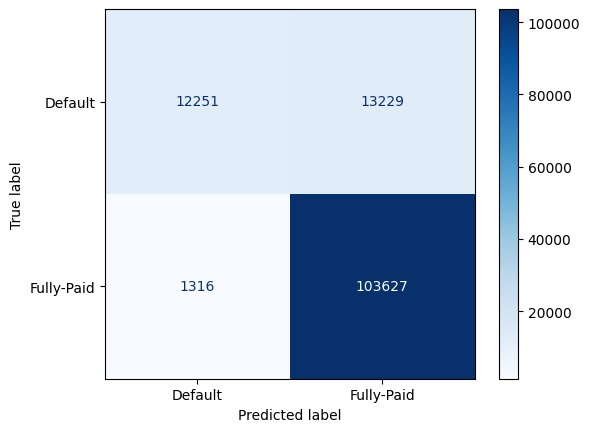

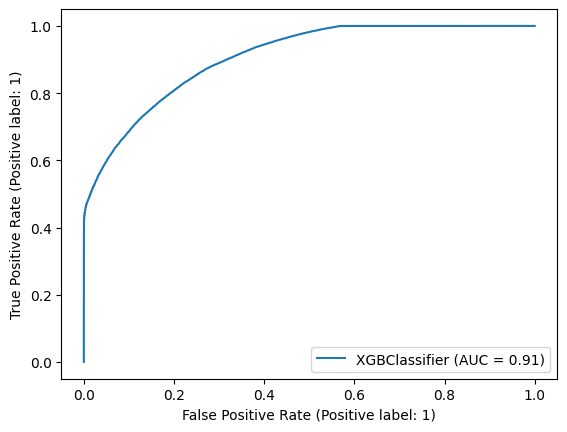

In [141]:
disp = ConfusionMatrixDisplay.from_estimator(
    xgb_clf, X_test, y_test,
    cmap='Blues', values_format='d',
    display_labels=['Default', 'Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)


In [142]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

**Random Forest Classifier**

In [143]:
# param_grid = dict(
#     n_estimators=stats.randint(100, 1500),
#     max_depth=stats.randint(10, 100),
#     min_samples_split=stats.randint(1, 10),
#     min_samples_leaf=stats.randint(1, 10),
# )

rf_clf = RandomForestClassifier(n_estimators=100)
# rf_cv = RandomizedSearchCV(
#     rf_clf, param_grid, cv=3, n_iter=60,
#     scoring='roc_auc', n_jobs=-1, verbose=1
# )
# rf_cv.fit(X_train, y_train)
# best_params = rf_cv.best_params_
# print(f"Best Parameters: {best_params}")
# rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision      1.0       1.0       1.0        1.0           1.0
recall         1.0       1.0       1.0        1.0           1.0
f1-score       1.0       1.0       1.0        1.0           1.0
support    51665.0  210478.0       1.0   262143.0      262143.0
_______________________________________________
Confusion Matrix: 
 [[ 51665      0]
 [     0 210478]]

Test Result:
Accuracy Score: 88.91%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0            1.0  accuracy      macro avg   weighted avg
precision      0.952146       0.882612  0.889107       0.917379       0.896196
recall         0.455259       0.994445  0.889107       0.724852       0.889107
f1-score       0.615989       0.935197  0.889107       0.775593       0.872835
support    25480.000000  104943.000000  0.88

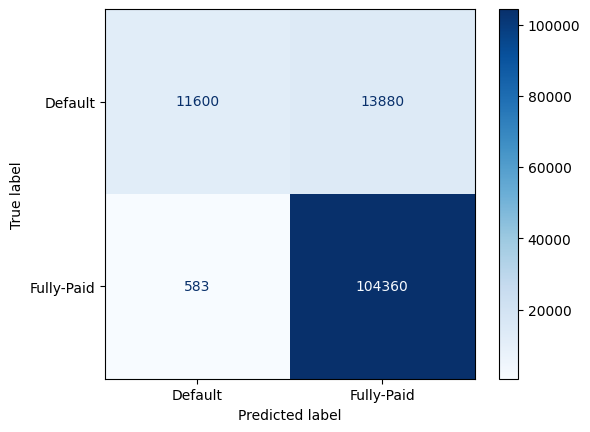

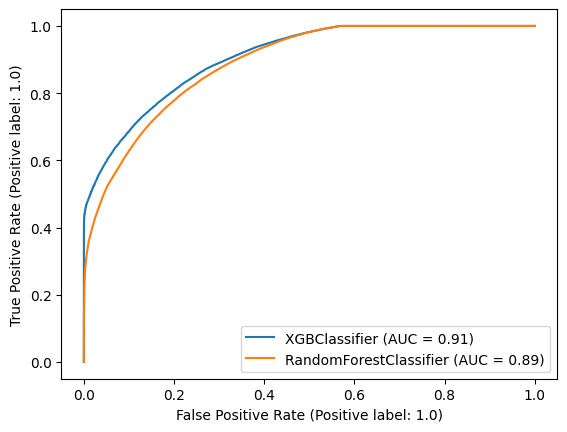

In [144]:
disp = ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test,
                             cmap='Blues', values_format='d',
                             display_labels=['Default', 'Fully-Paid'])

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=disp.ax_)

In [145]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

**Comparing Models Performance**

In [146]:

ml_models = {
    'Random Forest': rf_clf,
    'XGBoost': xgb_clf,
    'ANNs': model
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.725
XGBOOST                        roc_auc_score: 0.734
4076/4076 [==============================] - 10s 2ms/step
ANNS                           roc_auc_score: 0.902


<Axes: title={'center': 'ROC Scores of ML Models'}, xlabel='ROC Scores'>

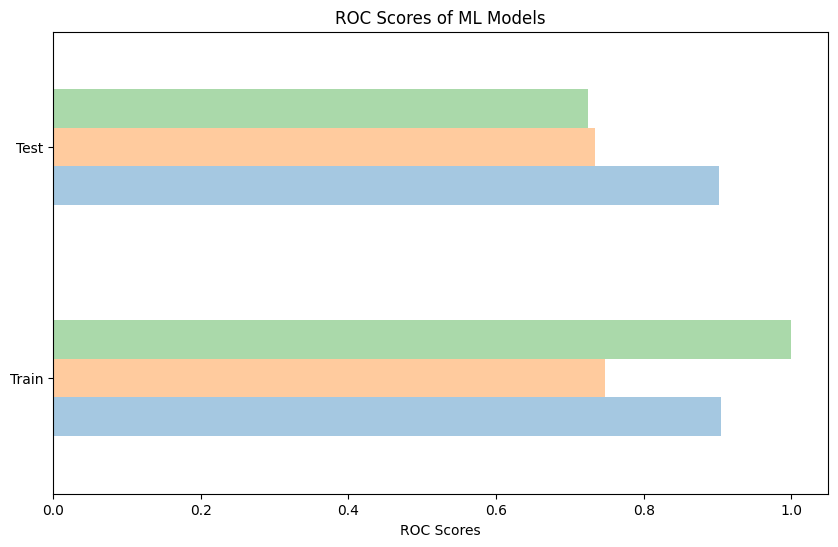

In [152]:
scores_df = pd.DataFrame(scores_dict)
scores_df.plot.barh(
    figsize=(10, 6),
    title="ROC Scores of ML Models",
    xlabel="ROC Scores",
    alpha=0.4,
    legend=False
)
